# Will It Rain in Sydney, Australia Tomorrow? -- Kristofer Schobert
## Preparing a data set for modeling Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



Here is the link to this dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package



In [243]:
df = pd.read_csv('weatherAUS.csv')

In [245]:
#We will only consider Sydney AUS to keep things simpler
df = df[df.Location =='Sydney'].reset_index().drop('index', axis=1)
df.head(12)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes
5,2008-02-06,Sydney,20.2,27.2,1.6,2.6,8.6,NaN,NaN,W,...,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,6.2,Yes
6,2008-02-07,Sydney,18.6,26.3,6.2,5.2,5.2,NaN,NaN,W,...,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,27.6,Yes
7,2008-02-08,Sydney,17.2,22.3,27.6,5.8,2.1,NaN,NaN,S,...,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,12.6,Yes
8,2008-02-09,Sydney,16.4,20.8,12.6,4.8,3.0,NaN,NaN,SSW,...,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,Yes,8.8,Yes
9,2008-02-10,Sydney,14.6,24.2,8.8,4.4,10.1,NaN,NaN,W,...,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,Yes,0.0,No


In [239]:
df.isna().sum()

Date                0
Location            0
MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustDir      1036
WindGustSpeed    1036
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


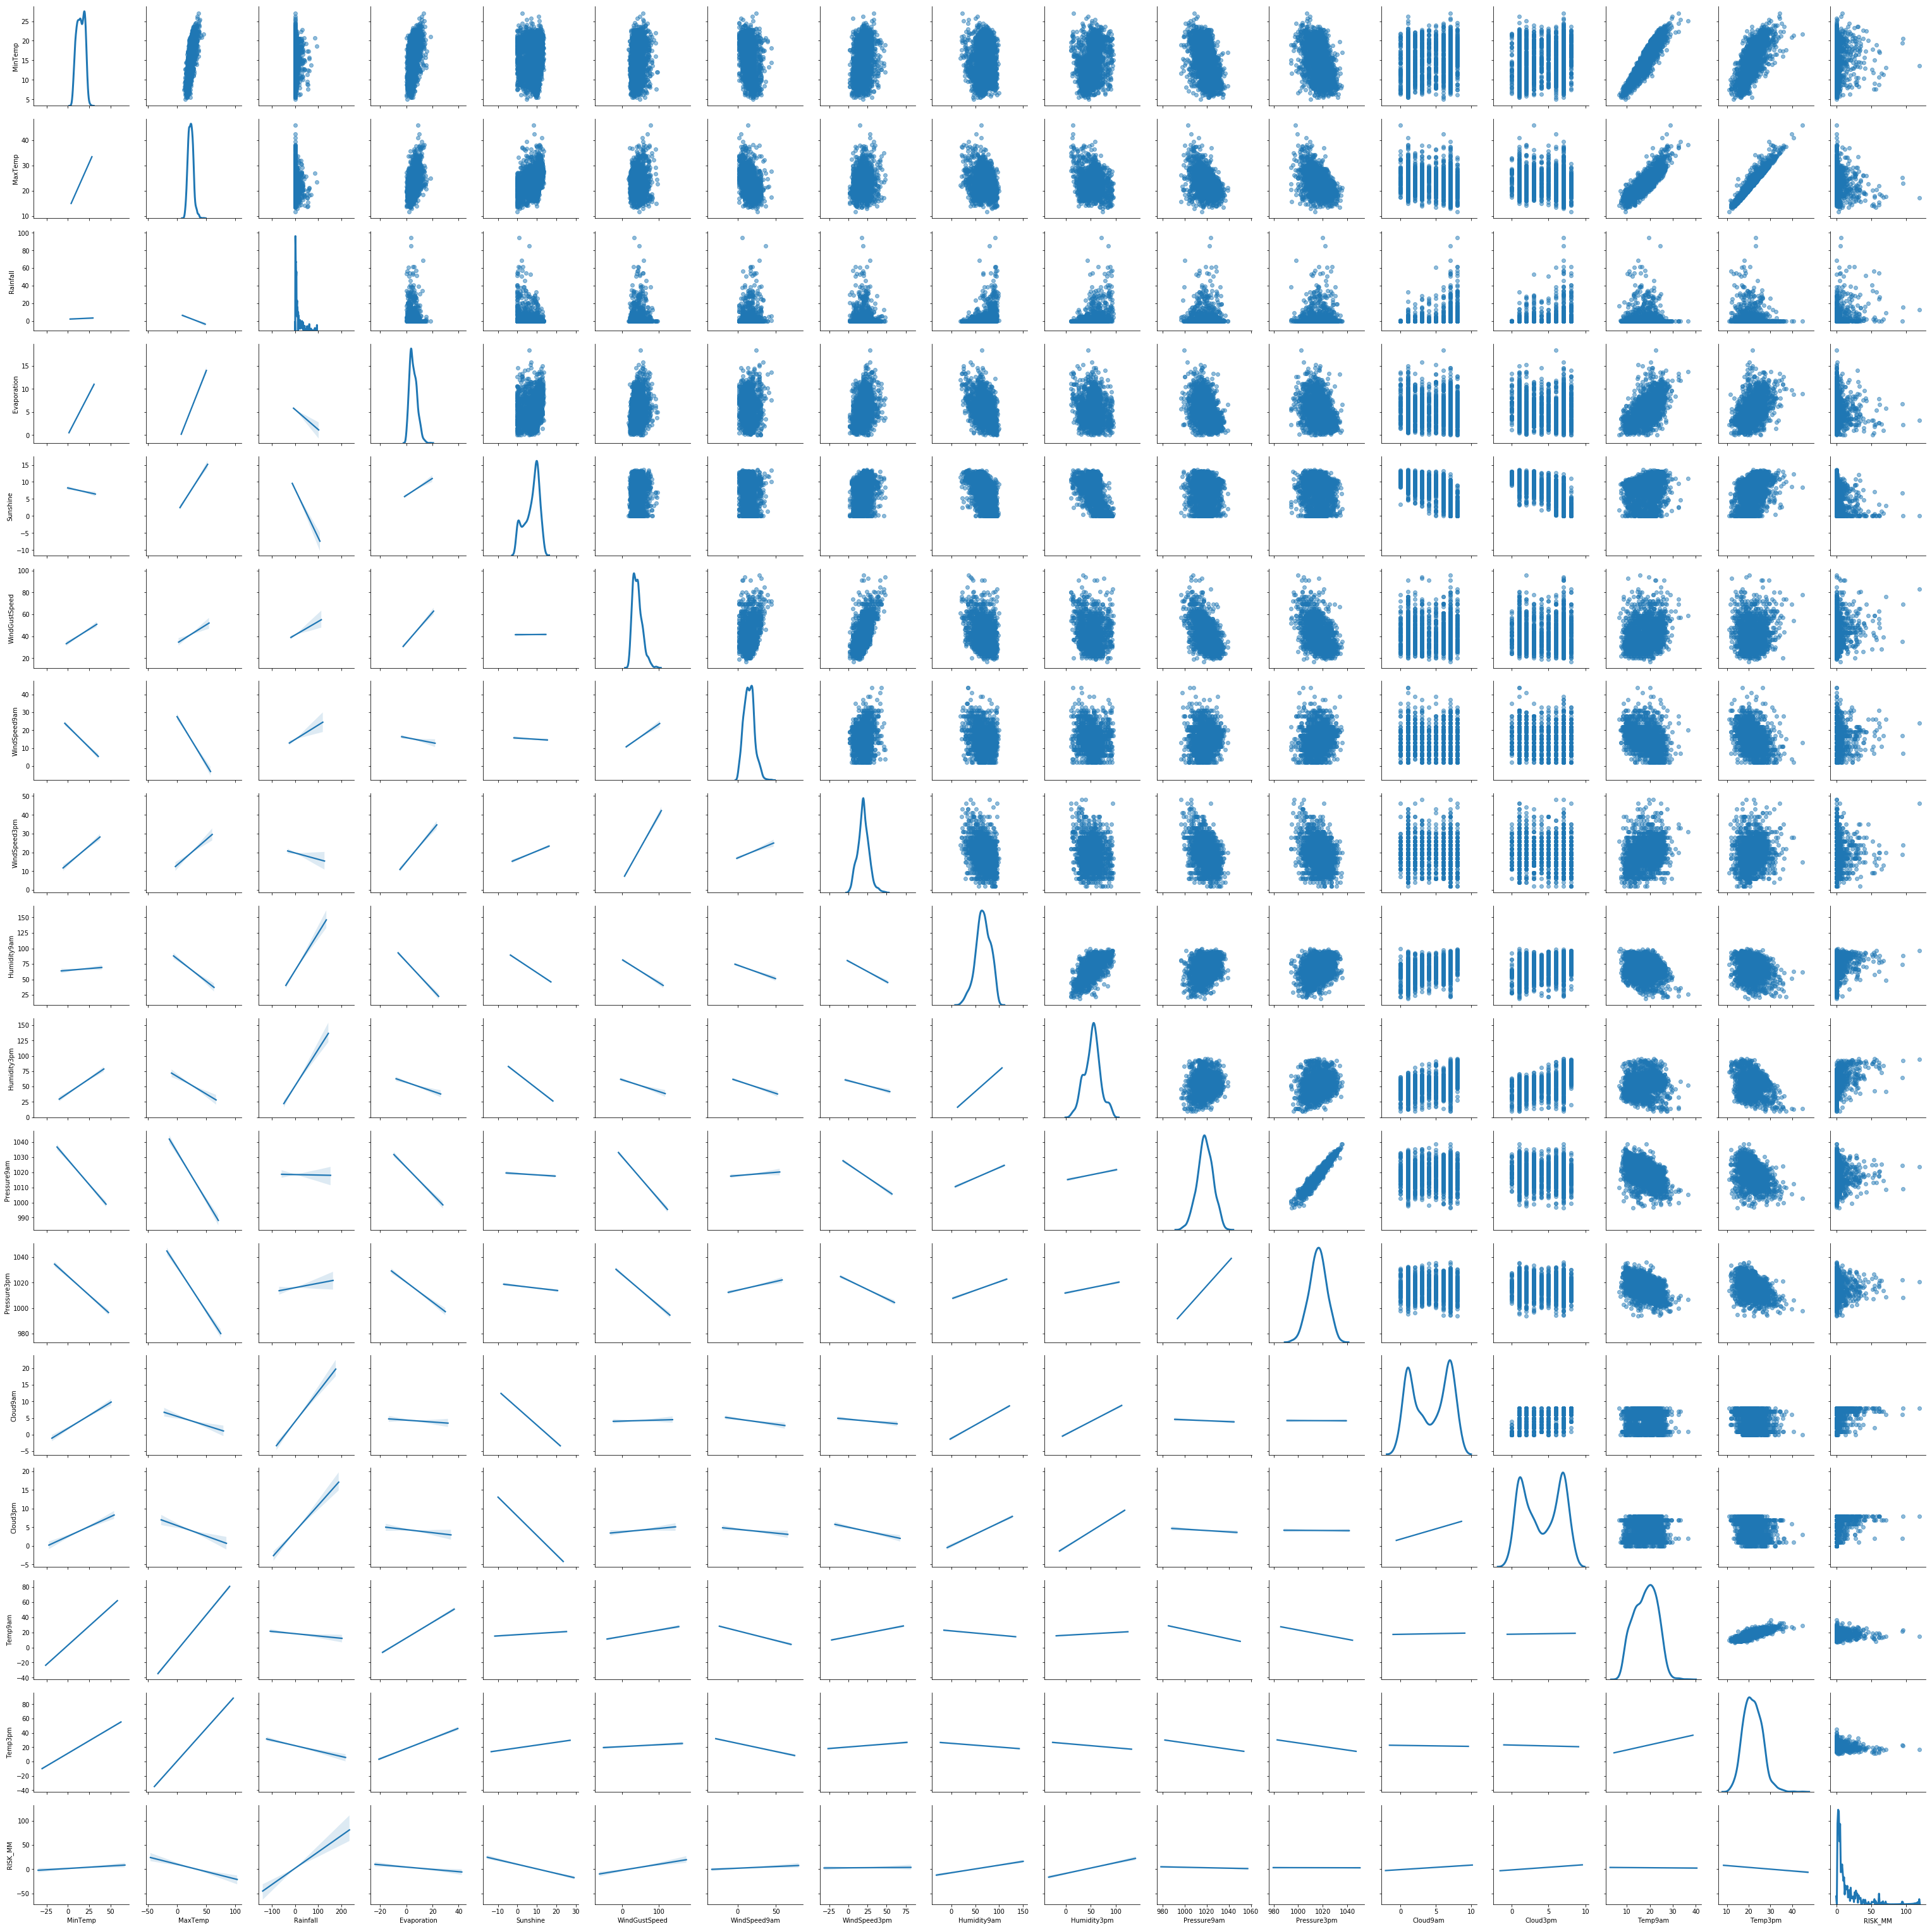

In [14]:
g = sns.PairGrid(df.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [15]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [23]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.770893,0.012883,0.571257,-0.063154,0.152866,-0.295392,0.223230,0.052490,0.271686,-0.393827,-0.356406,0.260508,0.180094,0.939116,0.752922,0.049180
MaxTemp,0.770893,1.000000,-0.140107,0.513138,0.326683,0.087761,-0.346058,0.151432,-0.187437,-0.152615,-0.389088,-0.425169,-0.095859,-0.108426,0.859346,0.960457,-0.135572
Rainfall,0.012883,-0.140107,1.000000,-0.126143,-0.308044,0.172328,0.154490,0.039445,0.331045,0.301681,-0.037051,0.003216,0.277427,0.229576,-0.056061,-0.143698,0.331817
Evaporation,0.571257,0.513138,-0.126143,1.000000,0.177628,0.299357,-0.076483,0.299911,-0.399019,-0.103246,-0.349421,-0.303330,-0.041160,-0.041205,0.608872,0.477629,-0.057144
Sunshine,-0.063154,0.326683,-0.308044,0.177628,1.000000,-0.037237,-0.057387,0.177049,-0.490967,-0.585736,-0.046654,-0.094841,-0.734302,-0.751838,0.115135,0.345139,-0.380596
WindGustSpeed,0.152866,0.087761,0.172328,0.299357,-0.037237,1.000000,0.312246,0.608804,-0.272105,-0.118067,-0.487067,-0.419732,0.035771,0.069785,0.191211,0.043013,0.207288
WindSpeed9am,-0.295392,-0.346058,0.154490,-0.076483,-0.057387,0.312246,1.000000,0.200485,-0.192824,-0.152921,0.002720,0.091597,-0.072609,-0.018735,-0.330575,-0.348396,0.098237
WindSpeed3pm,0.223230,0.151432,0.039445,0.299911,0.177049,0.608804,0.200485,1.000000,-0.291265,-0.136067,-0.331940,-0.277022,-0.061130,-0.100707,0.276973,0.132332,0.043352
Humidity9am,0.052490,-0.187437,0.331045,-0.399019,-0.490967,-0.272105,-0.192824,-0.291265,1.000000,0.659194,0.263977,0.252360,0.459455,0.359910,-0.148239,-0.157598,0.247030
Humidity3pm,0.271686,-0.152615,0.301681,-0.103246,-0.585736,-0.118067,-0.152921,-0.136067,0.659194,1.000000,0.154908,0.183647,0.498119,0.517755,0.128818,-0.214047,0.394535


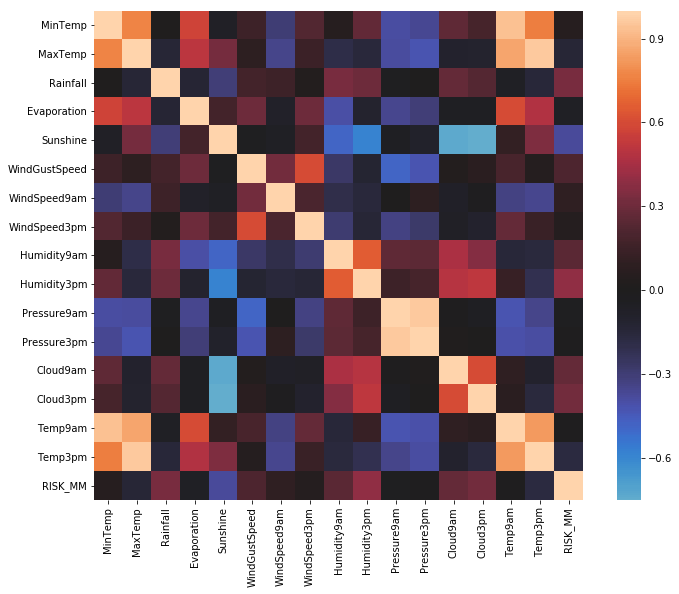

In [27]:
# Make the correlation matrix.
corrmat = df.corr()


# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=1, square=True, center=0)
plt.show()

After doing this initial exploration of the data, a few things jump out. One is that WindGustSpeed and WindGustDir have a lot of missing values. Because of this I will not use it as part of a feature. 

Also, Cloud9am and Cloud3pm have several missing values. However, those two variables are strongly negatively correlated with the Sunshine variable (which makes a lot of sense...). Luckily, the sunshine variable only has a few missing values. Thus, we will use the Sunshine variable instead.

Let's drop these column that we will not need. 

The MaxTemp, MinTemp, Temp9am, and Temp3pm are all very well correlated with eachother as one would expect. These may be redundant... I'll concider droping some after more exploration.

Also, let's make a month column. It seems reasonalbe that the time of year can be related to rain fall

In [247]:
df = df.drop(['WindGustSpeed','WindGustDir','Location','Cloud9am', 'Cloud3pm'], axis=1)
df['Month'] = pd.to_numeric(df.Date.str.slice(5, 7))

Let's look at some boxplots that compare values of variables for days when it did not rain tomorrow vs days when it rained tomorrow.

In [248]:
df.head(10)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,S,SSW,17.0,20.0,92.0,84.0,1017.6,1017.4,20.7,20.9,Yes,6.0,Yes,2
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,W,E,9.0,13.0,83.0,73.0,1017.9,1016.4,22.4,24.8,Yes,6.6,Yes,2
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,23.5,23.0,Yes,18.8,Yes,2
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,21.4,20.9,Yes,77.4,Yes,2
4,2008-02-05,19.7,25.7,77.4,NaN,0.0,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,22.5,25.5,Yes,1.6,Yes,2
5,2008-02-06,20.2,27.2,1.6,2.6,8.6,W,ENE,9.0,22.0,69.0,62.0,1002.7,998.6,23.8,26.0,Yes,6.2,Yes,2
6,2008-02-07,18.6,26.3,6.2,5.2,5.2,W,S,15.0,15.0,75.0,80.0,999.0,1000.3,21.7,22.3,Yes,27.6,Yes,2
7,2008-02-08,17.2,22.3,27.6,5.8,2.1,S,SE,7.0,15.0,77.0,61.0,1008.3,1007.4,18.9,21.1,Yes,12.6,Yes,2
8,2008-02-09,16.4,20.8,12.6,4.8,3.0,SSW,W,19.0,9.0,92.0,91.0,1006.4,1007.6,17.1,16.5,Yes,8.8,Yes,2
9,2008-02-10,14.6,24.2,8.8,4.4,10.1,W,SSE,11.0,20.0,80.0,53.0,1014.0,1013.4,17.2,23.3,Yes,0.0,No,2


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


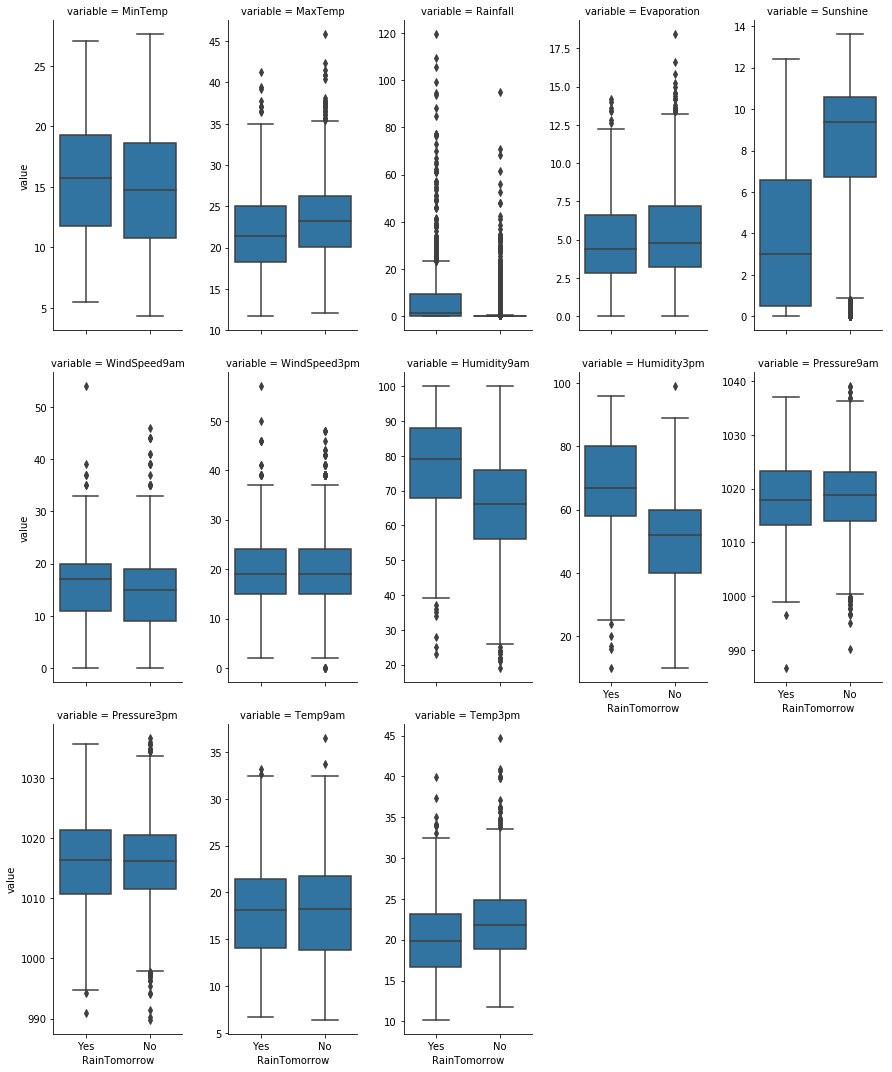

In [106]:
df_continuous_compare_rain_tomorrow = df[['MinTemp', 
                                           'MaxTemp', 
                                           'Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
        'Pressure9am', 'Pressure3pm', 'Temp9am',
        'Temp3pm',
                                          'RainTomorrow']]

df_continuous_compare_rain_tomorrow  = pd.melt(df_continuous_compare_rain_tomorrow , id_vars=['RainTomorrow'])

g = sns.FacetGrid(df_continuous_compare_rain_tomorrow, col="variable", size=5, aspect=.5, col_wrap=5, sharey=False)
g = g.map(sns.boxplot, "RainTomorrow", "value")
plt.show()


These boxplots are helpful. They let us compare the values of each continuous variable in both cases of RainTomorrow.

The variables which stand out as being drastically different for having rain tomorrow or not are Rainfall, Sunshine, Humidity3pm, Temp3pm.


It may be worth noting that mintemp is larger on days in rains tomorrow and maxtemp is smaller on days it rains tomorrow. That means a smaller range of temperatures throughout the day is more common when it rains tomorrow. Makes some sense... water in the air keeps the temperature more constant (similar to why beach towns dont sway in temperature as much as inland towns) and then that water rains down the next day.

It would be neat to combine humidity3pm with temp3pm. Lets divide humidity by temperature. Humidity as larger when it rains tomorrow and temperature is less when it rains tomorrow. big/small == extra big. small/big == extra small. This should amplify the effect. the humidity/temperature value is much higher when it will rain tomorrow than if it will not rain tomorrow.  

Sunshine * Temp3pm as a feature would be useful in a similar way. A high temp and a lot of sunshine often yeild no rain, while a low temp and no sunshine yeild more rain. 

Let's plot our categorial variables



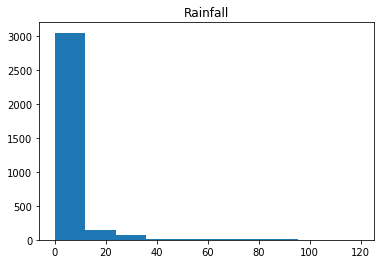

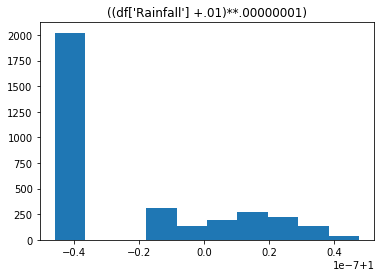

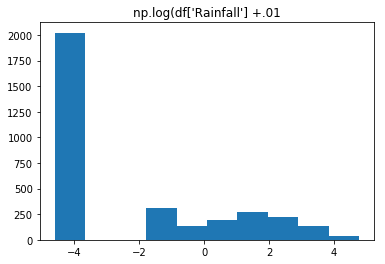

In [197]:
plt.hist((df['Rainfall']).dropna())
plt.title('Rainfall')
plt.show()
plt.hist(((df['Rainfall'] +.01)**.00000001).dropna())
plt.title('((df[\'Rainfall\'] +.01)**.00000001)')
plt.show()
plt.hist((np.log(df['Rainfall'] +.01)).dropna())
plt.title('np.log(df[\'Rainfall\'] +.01')
plt.show()


Rainfall is pretty complicated having so so many zero values. The distribution looks to be poissonian. Right? how many mm of rain in a day. that would be poissonian. 

Also I have made some sence of why the two lower plots group the variable in similar ways. First off I added a little bit to each value so there were no zero values anymore. log(x) and x**.000001 are more similar than I realized. If you take a derivative they have just about the result! 1/x vs 1/x**.99999999 . thus they kinda just differ by a constant. logx goes through (1,0), x**.000001 goes through (1,1). the constant is 1. neat. think this all makes sense...

While it is very not normal. I think I will use it as a feature just to learn and see what happenens. It's going to have problems centering about its mean and having a well distributed data about the mean. All the data will be on the mean or to one side of it. 

Let's plot our categorial variables

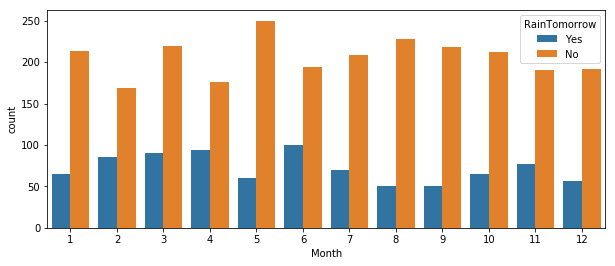

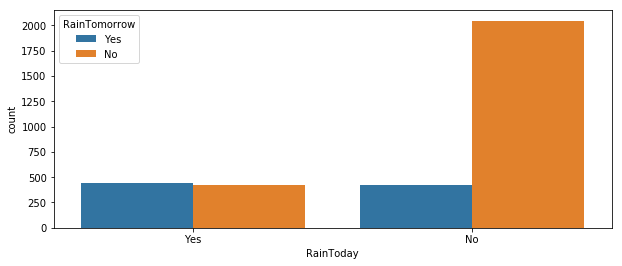

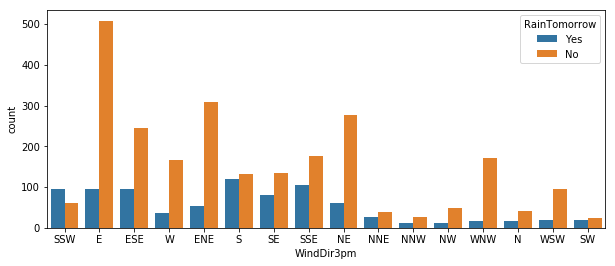

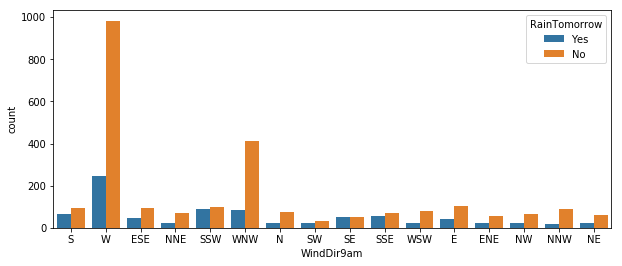

In [157]:
plt.figure(figsize=(10,4))

df_categorical = df[['RainToday', 'Month', 'WindDir3pm', 'WindDir9am', 'RainTomorrow']]

g1 = sns.countplot(x="Month", hue='RainTomorrow', data=df_categorical)
plt.show()
plt.figure(figsize=(10,4))
g2 = sns.countplot(x="RainToday", hue='RainTomorrow', data=df_categorical)
plt.show()
plt.figure(figsize=(10,4))
g3 = sns.countplot(x='WindDir3pm', hue='RainTomorrow', data=df_categorical)
plt.show()
plt.figure(figsize=(10,4))
g4 = sns.countplot(x='WindDir9am', hue='RainTomorrow', data=df_categorical)
plt.show()



Some things to note about these plots, there is some variability in the likelihood of it raining tomorrow depending on the month. We can think of it raining tomorrow as a weighted coin toss. The weights are the relative heights of the blue bar vs the orange bar. No matter the month, it is always more likely not to rain tomorrow. But the weight of the coin toss varies from month to month.

If it does not rain today, it will most likely not rain tomorrow. However, if it does rain today, there is a slightly higher change it will rain tomorrow. Very interesting. Once you are on the rainy "path" you're more likely to stay on it. But once your weighted coin shows "yes, rain tomorrow," you'll likely be stuck on the not rainy path for a long while, given the extreme weight of that coin.

I assume the wind direction at 3pm is more telling of tomorrow's rain chance by the simple fact that 3pm is closer to tomorrow than 9am... Creating a feature that is the change in direction throughout the day is an interesting idea, but subtracting, for example, SE from SSW seems like a daunghting task that probably aint that fruitful. You could turn them into 2d unit vectors then subtract the vectors and normalize the final vector??

Well one interesting thing about the 3pm wind direction plot is the fact the coin is weighted in favor for rain when the wind is coming from the SSW! Thats the only direction with that property! interesting... In general the weights of the coins vary a lot for the different 3pm wind directions. 

I'll keep RainToday and WindDir3pm.

Also maxtemp is real similar to temp3pm. but im using them within features in their own way. I think it is okay to keep both of them around within features. It would be redundant to use both of them if they were being used as features. It would be best for memory to just use one... i'm gonna role with both for now. 


## Categorial variables: RainToday, WindDir3pm

## Continuous variables: Sunshine, Humidity3pm, Humidity9am, Temp3pm, MinTemp, MaxTemp, Rainfall

## Outcome variable: Rain Tomorrow



# Feature Creation

Some of my features will be just plain variables. Hope no one minds.

1. RainToday
2. WindDir3pm
3. Temperature Range (MaxTemp - MinTemp)
4. Sunshine
5. Temp3pm
6. Humidity3pm
7. Humidity3pm / Temp3pm
8. Sunshine * Temp3pm
9. Change in Humidity (Humidity3pm - Humidity9am)
10. Rainfall

In [298]:
features = df[['Rainfall',
       'Sunshine', 'WindDir3pm', 'Humidity3pm',
       'Temp3pm', 'RainToday','RainTomorrow']].copy()

features['TempRange'] = df['MaxTemp'] - df['MinTemp']
features['Humidity3pm_over_Temp3pm'] = df['Humidity3pm'] / df['Temp3pm']
features['Sunshine_times_Temp3pm'] = df['Sunshine'] / df['Temp3pm']
features['Change_in_Humidity'] = df['Humidity3pm'] - df['Humidity9am']


features.head()
#features['Humidity_over_Temp'] = df['Humidity3pm'] / df['Temp3pm']


,Rainfall,Sunshine,WindDir3pm,Humidity3pm,Temp3pm,RainToday,RainTomorrow,TempRange,Humidity3pm_over_Temp3pm,Sunshine_times_Temp3pm,Change_in_Humidity
0,15.6,0.0,SSW,84.0,20.9,Yes,Yes,2.9,4.019139,0.000000,-8.0
1,6.0,2.7,E,73.0,24.8,Yes,Yes,6.1,2.943548,0.108871,-10.0
2,6.6,0.1,ESE,86.0,23.0,Yes,Yes,2.9,3.739130,0.004348,-2.0
3,18.8,0.0,E,90.0,20.9,Yes,Yes,2.6,4.306220,0.000000,7.0
4,77.4,0.0,W,74.0,25.5,Yes,Yes,6.0,2.901961,0.000000,-14.0


## Filtering Methods

It seems my method for selecting which variables to work with was in a way a filtering method. 

We know normally distributed data is best for PCA. So lets see which of these features are normal. We cannot do this with categorical data. 

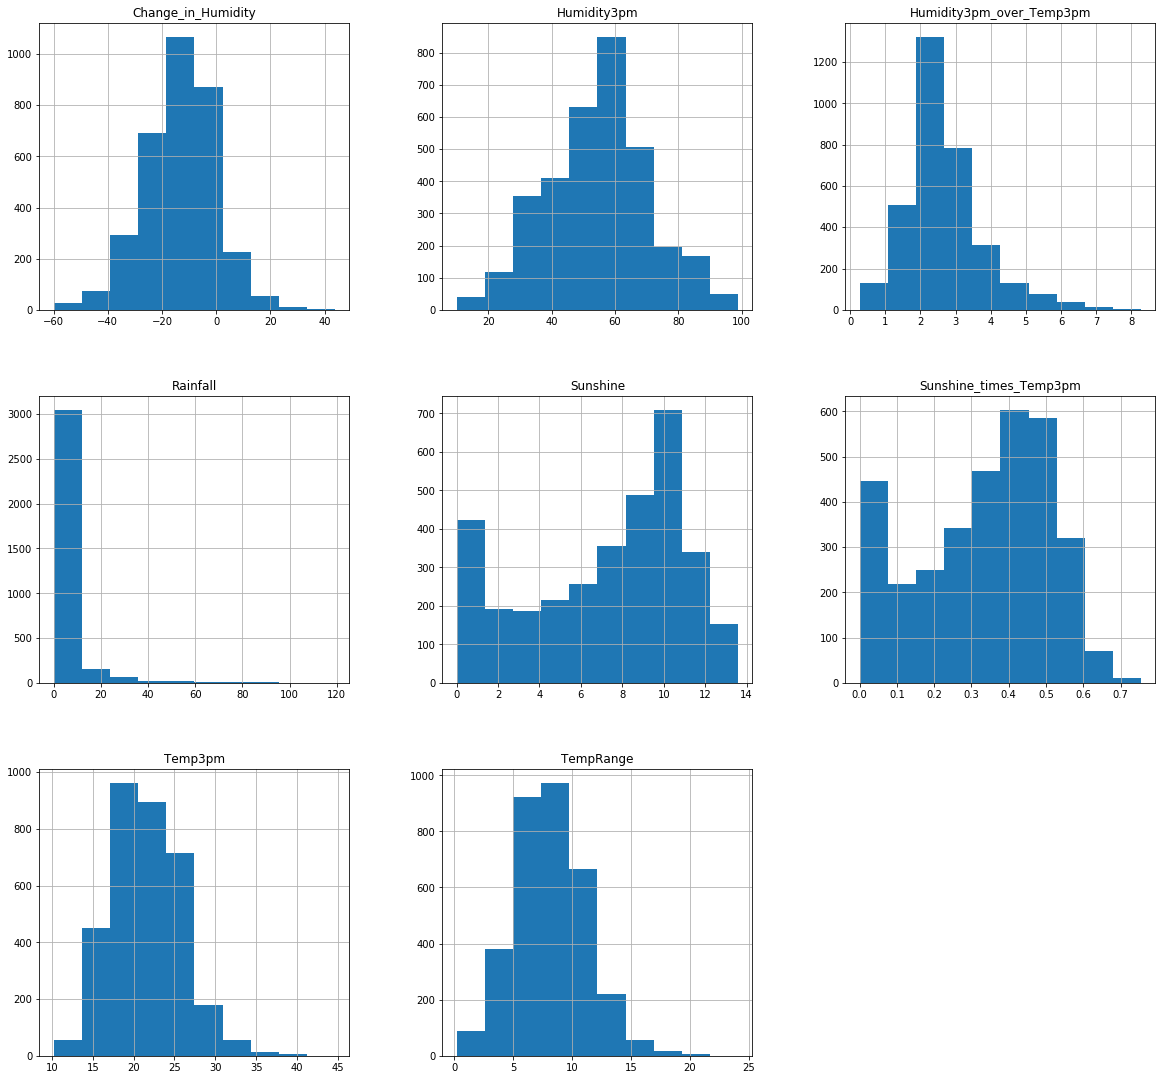

In [297]:

features.hist(figsize = (20,19))
plt.show()

These are mostly normal except of course Rainfall as we noticed before... alright let's get rid of it. 

In [ ]:
features = features.drop(['Rainfall'], axis=1)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


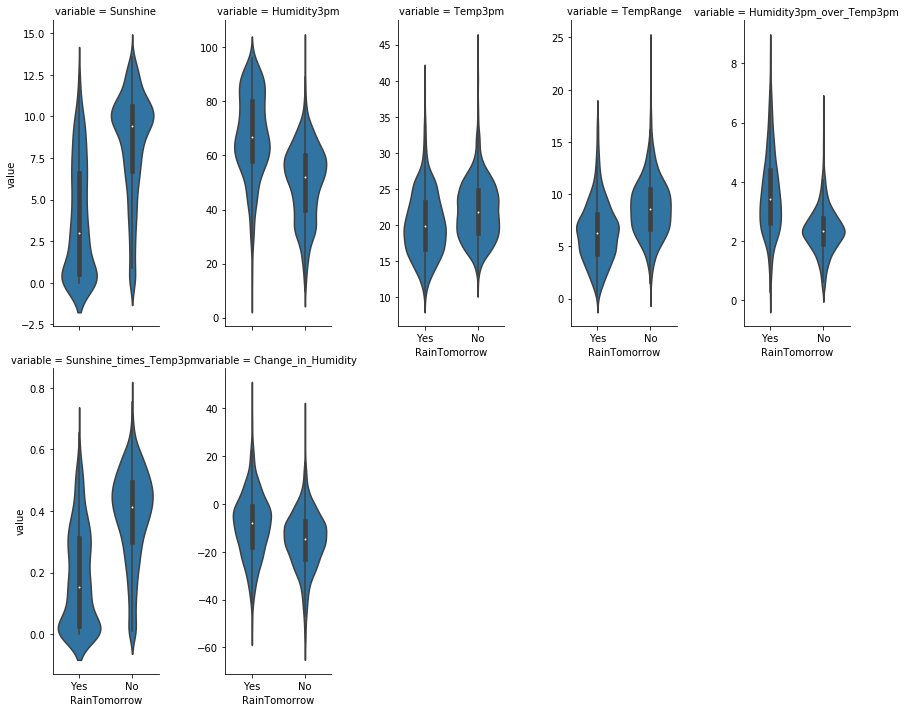

In [313]:

features_continuous = features.drop(['WindDir3pm','RainToday'], axis=1).copy()

features_continuous  = pd.melt(features_continuous, id_vars=['RainTomorrow'])

g = sns.FacetGrid(features_continuous, col="variable", size=5, aspect=.5, col_wrap=5, sharey=False)
g = g.map(sns.violinplot, "RainTomorrow", "value")
plt.show()

Change in Humidity values for rain tomorrow and no rain tomorrow are not all that different when viewed from a violinplot. Their distributions seems similar. let's drop it.

Let's drop WindDir3pm too. While it is cool that when wind is coming from SSW it is more likely to rain, that rarely happens. From the plot we have a few figures ago, one can see that the wind rarely comes from this direction anyway. The blue and orange bar for SSW are both small compared to some other wind direction bars. 

At first I thought, get rid of Temp3pm. Its information is encoded in Sunshine times Temp3pm, but I am a little concerned this is a bad idea. I feel like leaving the two measurements untouched is better than droping one but keeping it around by multiplying it to the other measurement. Although Sunshine times Temperature does seem like a really good indicator of rain tomorrow. I'll just drop temp3pm. Again, I dont have experience to tell me whether or not this is a bad call...

I'll also get rid of humidity3pm/temp3pm. The violinplot doesnt seem to show that that feature is that excellent at predicting. Its information is within other features anyways. 

# The 5 Features After Filter Are...

1. RainToday
2. Temperature Range (MaxTemp - MinTemp)
3. Sunshine
4. Humidity3pm
5. Sunshine * Temp3pm 


